Tests on Vision Transformer Architecture

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import(Flatten, Dense, Dropout, Input, LayerNormalization, Concatenate)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pkdarabi/bone-break-classification-image-dataset")

path = os.path.join(path,'Bone Break Classification/Bone Break Classification')

In [ ]:
def collect_image_data_paths(directory):
  data = []
  # Scanning each directory
  for class_folder in os.listdir(directory):
    class_path = os.path.join(directory, class_folder)
    print(class_path)
    if os.path.isdir(class_path):
      for split in ['Train','Test']:
        split_path = os.path.join(class_path, split)

        if os.path.isdir(split_path):
          for image_name in os.listdir(split_path):
            image_path = os.path.join(split_path, image_name)
            data.append({'path': image_path, 'target': class_folder, 'split': split})
  return data


# Collect the data
data = collect_image_data_paths(path)

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())


/kaggle/input/bone-break-classification-image-dataset/Bone Break Classification/Bone Break Classification/Avulsion fracture
/kaggle/input/bone-break-classification-image-dataset/Bone Break Classification/Bone Break Classification/Spiral Fracture
/kaggle/input/bone-break-classification-image-dataset/Bone Break Classification/Bone Break Classification/Impacted fracture
/kaggle/input/bone-break-classification-image-dataset/Bone Break Classification/Bone Break Classification/Hairline Fracture
/kaggle/input/bone-break-classification-image-dataset/Bone Break Classification/Bone Break Classification/Greenstick fracture
/kaggle/input/bone-break-classification-image-dataset/Bone Break Classification/Bone Break Classification/Pathological fracture
/kaggle/input/bone-break-classification-image-dataset/Bone Break Classification/Bone Break Classification/Oblique fracture
/kaggle/input/bone-break-classification-image-dataset/Bone Break Classification/Bone Break Classification/Fracture Dislocation
/k

In [ ]:
df.split.value_counts()

,count
split,
Train,989
Test,140


In [ ]:
df.target.value_counts()

,count
target,
Fracture Dislocation,156
Comminuted fracture,148
Pathological fracture,134
Avulsion fracture,123
Greenstick fracture,122
Hairline Fracture,111
Spiral Fracture,86
Oblique fracture,85
Impacted fracture,84


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 10
img_height = 256
img_width = 256

# Filter the full training DataFrame
train_df_full = df[df['split'] == 'Train']

# Perform a stratified split into training and validation sets (80% train, 20% validation)
train_df, val_df = train_test_split(
    train_df_full,
    test_size=0.2,
    random_state=42,
    stratify=train_df_full['target']
)

# Create separate ImageDataGenerators for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the training generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='target',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Create the validation generator
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='path',
    y_col='target',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Create the test generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df[df['split'] == 'Test'],
    x_col='path',
    y_col='target',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Print the total number of samples in each generator
print(f'Train samples: {train_generator.samples}')
print(f'Validation samples: {val_generator.samples}')
print(f'Test samples: {test_generator.samples}')

# Print the number of images per class for each set using value_counts()
print("\nTrain samples per class:")
print(train_df['target'].value_counts())

print("\nValidation samples per class:")
print(val_df['target'].value_counts())

print("\nTest samples per class:")
test_df = df[df['split'] == 'Test']
print(test_df['target'].value_counts())


Found 791 validated image filenames belonging to 10 classes.
Found 198 validated image filenames belonging to 10 classes.
Found 140 validated image filenames belonging to 10 classes.
Train samples: 791
Validation samples: 198
Test samples: 140

Train samples per class:
target
Fracture Dislocation     110
Comminuted fracture      107
Pathological fracture     93
Avulsion fracture         87
Greenstick fracture       85
Hairline Fracture         81
Impacted fracture         60
Spiral Fracture           59
Oblique fracture          55
Longitudinal fracture     54
Name: count, dtype: int64

Validation samples per class:
target
Fracture Dislocation     27
Comminuted fracture      27
Pathological fracture    23
Avulsion fracture        22
Greenstick fracture      21
Hairline Fracture        20
Spiral Fracture          15
Impacted fracture        15
Longitudinal fracture    14
Oblique fracture         14
Name: count, dtype: int64

Test samples per class:
target
Fracture Dislocation     19
Pat

In [ ]:
train_generator.class_indices

{'Avulsion fracture': 0,
 'Comminuted fracture': 1,
 'Fracture Dislocation': 2,
 'Greenstick fracture': 3,
 'Hairline Fracture': 4,
 'Impacted fracture': 5,
 'Longitudinal fracture': 6,
 'Oblique fracture': 7,
 'Pathological fracture': 8,
 'Spiral Fracture': 9}

In [ ]:
class_idx_to_name={v: k for k,v in train_generator.class_indices.items()}

print(f"Class index to name mapping: {class_idx_to_name}")

# Print the validation generator's class indices to verify consistency
print(f"Validation class indices: {val_generator.class_indices}")

Class index to name mapping: {0: 'Avulsion fracture', 1: 'Comminuted fracture', 2: 'Fracture Dislocation', 3: 'Greenstick fracture', 4: 'Hairline Fracture', 5: 'Impacted fracture', 6: 'Longitudinal fracture', 7: 'Oblique fracture', 8: 'Pathological fracture', 9: 'Spiral Fracture'}
Validation class indices: {'Avulsion fracture': 0, 'Comminuted fracture': 1, 'Fracture Dislocation': 2, 'Greenstick fracture': 3, 'Hairline Fracture': 4, 'Impacted fracture': 5, 'Longitudinal fracture': 6, 'Oblique fracture': 7, 'Pathological fracture': 8, 'Spiral Fracture': 9}


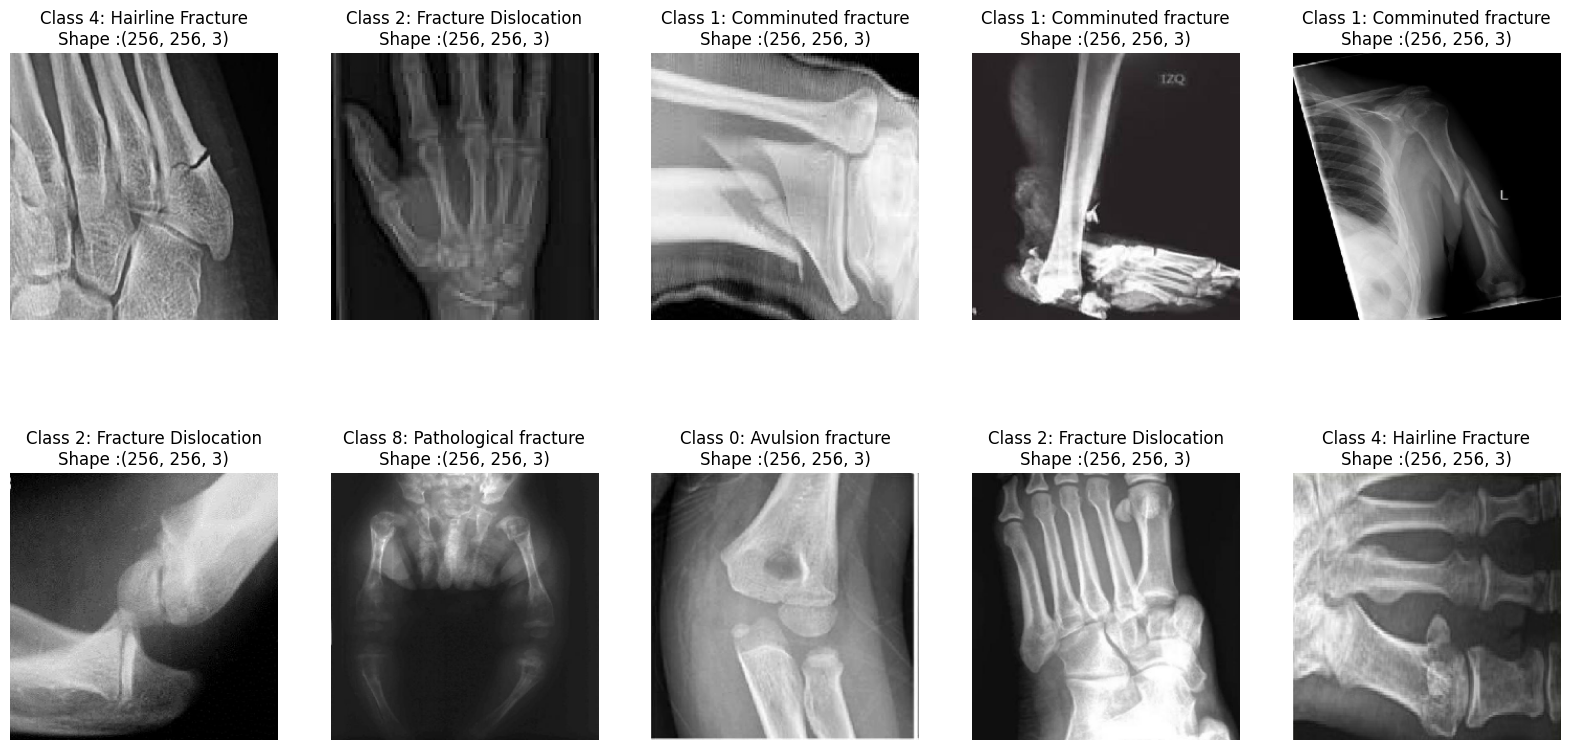

In [ ]:
# Visualise the images:
def plot_images(generator,num_images= 10):
  images, labels =  next(generator)
  plt.figure(figsize = (20,10))

  for i in range(num_images):
    class_idx = np.argmax(labels[i])
    class_name = class_idx_to_name[class_idx]
    plt.subplot(2,5,i+1)
    plt.imshow(images[i])
    plt.title(f"Class {np.argmax(labels[i])}: {class_name}\nShape :{images[i].shape}")
    plt.axis('off')


  plt.show()


plot_images(train_generator, num_images = 10)

Vision Transformer architechture

In [ ]:
# patch creation:


class PatchExtractor(tf.keras.layers.Layer):
  def __init__(self,patch_size):
    super().__init__()
    self.patch_size= patch_size

  def call(self, images):
    batch_size =  tf.shape(images)[0]
    patches = tf.image.extract_patches(images= images,
                                       sizes = [1, self.patch_size, self.patch_size,1],
                                       strides = [1, self.patch_size, self.patch_size,1],
                                       rates = [1,1,1,1],
                                       padding='VALID'
                                       )
    patch_dims = patches.shape[-1]
    patches = tf.reshape(patches, [batch_size, -1, patch_dims])
    return patches


# Encoding the patches



class PatchEncoder(tf.keras.layers.Layer):
  def __init__(self, num_patches, projection_dim):
    super().__init__()
    self.projection = tf.keras.layers.Dense(units= projection_dim)
    self.position_embedding =  tf.keras.layers.Embedding(input_dim=num_patches, output_dim = projection_dim)

  def call(self,patch):
    positions = tf.range(start = 0, limit = tf.shape(patch)[1], delta = 1)
    encoded = self.projection(patch)+self.position_embedding(positions)
    return encoded

In [ ]:
# MLP Block




def mlp(x, hidden_units, dropout_rate):
  for units in hidden_units:
     x = tf.keras.layers.Dense(units, activation = tf.nn.gelu)(x)
     x = tf.keras.layers.Dropout(dropout_rate)(x)
  return x
# Transformer Encoder Block
class TransformerBlock(tf.keras.layers.Layer):
  def __init__(self, num_heads, projection_dim, transformer_units, dropout_rate):
    super().__init__()
    self.att = tf.keras.layers.MultiHeadAttention(num_heads = num_heads,key_dim = projection_dim)
    self.norm1= tf.keras.layers.LayerNormalization()
    self.norm2 = tf.keras.layers.LayerNormalization()
    self.mlp = tf.keras.Sequential([
        tf.keras.layers.Dense(transformer_units, activation = tf.nn.gelu),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(projection_dim),
        tf.keras.layers.Dropout(dropout_rate)])


  def call(self,x):
    attn_output = self.att(x,x)
    x= self.norm1(x+attn_output)
    x=self.norm2(x+self.mlp(x))
    return x




# Final ViT Model




def build_vit_model(input_shape= (256,256,3),
                patch_size=16,projection_dim=64, transformer_layers = 64, num_heads= 4, transformer_units = 128, dropout_rate = 0.1, num_classes= 10):
  num_patches = (input_shape[0] // patch_size)**2
  inputs = tf.keras.layers.Input(shape=input_shape)
  patches = PatchExtractor(patch_size)(inputs)
  encoded_patches= PatchEncoder(num_patches, projection_dim)(patches)

  for _ in range(transformer_layers):
    encoded_patches=TransformerBlock(num_heads,projection_dim, transformer_units,dropout_rate)(encoded_patches)
  x = tf.keras.layers.LayerNormalization()(encoded_patches)
  #x = tf.keras.layers.Flatten()(x)
  x= tf.keras.layers.GlobalAveragePooling1D()(x)
  x = tf.keras.layers.Dense(256, activation= tf.nn.gelu)(x)
  x= tf.keras.layers.Dropout(0.5)(x)
  outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
  model = tf.keras.Model(inputs=inputs, outputs = outputs)
  return model




In [ ]:
vit_model = build_vit_model()
vit_model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'categorical_crossentropy', metrics= ['accuracy'])
vit_model.fit(train_generator,validation_data= test_generator,epochs =50)

Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 484s 2s/step - accuracy: 0.1197 - loss: 2.4097 - val_accuracy: 0.1000 - val_loss: 2.3286
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.1271 - loss: 2.3280 - val_accuracy: 0.1357 - val_loss: 2.2997
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.1080 - loss: 2.3163 - val_accuracy: 0.1357 - val_loss: 2.3105
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.1084 - loss: 2.3266 - val_accuracy: 0.1143 - val_loss: 2.3071
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.1247 - loss: 2.3187 - val_accuracy: 0.1286 - val_loss: 2.3001
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.0978 - loss: 2.3123 - val_accuracy: 0.1000 - val_loss: 2.3205
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.1382 - loss: 2.2928 - val_accuracy: 0.1000 - val_loss: 2.2990
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.1329 - loss: 2.2902 - val_accura